In [5]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
from geospacepy.special_datetime import datetimearr2jd
from geospacepy.sun import solar_position_almanac

dts = [datetime.datetime(2020,1,1)+datetime.timedelta(hours=h) for h in range(24*2)]
jds = datetimearr2jd(dts)
ra_rad,dec_rad = solar_position_almanac(jds)
ra_deg,dec_deg = np.degrees(ra_rad),np.degrees(dec_rad)

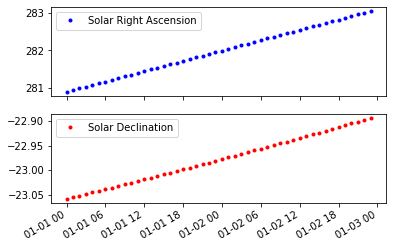

In [8]:
f = plt.figure()
ax1 = f.add_subplot(211)
ax2 = f.add_subplot(212)

ax1.plot(dts,ra_deg,'b.',label='Solar Right Ascension')
ax2.plot(dts,dec_deg,'r.',label='Solar Declination')
ax1.legend()
ax2.legend()
f.autofmt_xdate()
plt.show()